# Employee Attrition Prediction

## Introduction
Employee attrition is a critical challenge faced by organizations across industries. High attrition rates can lead to increased costs, reduced productivity, and negative impacts on employee morale. To address this issue, organizations need to identify the factors contributing to attrition and develop strategies to retain top talent.

## content
##### 1. Load the data
##### 2. Data Exploration and Data Visualization
##### 3. Feature Engineering
##### 4. Model Selection
##### 5. Model Training
##### 6. Model Evaluation
##### 7. Hyperparameter Tuning
##### 8. Final Model
##### 9. Conclusion
##### 10. Summary
##### 11. Note

In [ ]:
from gettext import install

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [14]:
df = pd.read_csv('D:/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [15]:
df.shape

(1470, 35)

In [16]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
df.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


from this point we can see that there are no missing values in the dataset and we can proceed to the next step
but, before that we can change the data of [Jobsatisfaction, Education, EnvironmentSatisfaction, JobInvolvement, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance] to be a string data type which is more readable and easier to understand.

In [20]:
df['JobSatisfaction'] = df['JobSatisfaction'].replace(1, 'Low')
df['JobSatisfaction'] = df['JobSatisfaction'].replace(2, 'Averge')
df['JobSatisfaction'] = df['JobSatisfaction'].replace(3, 'Good')
df['JobSatisfaction'] = df['JobSatisfaction'].replace(4, 'Excellent')
df['Education'] = df['Education'].replace(1, 'Below College')
df['Education'] = df['Education'].replace(2, 'College')
df['Education'] = df['Education'].replace(3, 'Bachelor')
df['Education'] = df['Education'].replace(4, 'Master')
df['Education'] = df['Education'].replace(5, 'Doctor')
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace(1, 'Low')
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace(2, 'Averge')
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace(3, 'Good')
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace(4, 'Excellent')
df['JobInvolvement'] = df['JobInvolvement'].replace(1, 'Low')
df['JobInvolvement'] = df['JobInvolvement'].replace(2, 'Averge')
df['JobInvolvement'] = df['JobInvolvement'].replace(3, 'Good')
df['JobInvolvement'] = df['JobInvolvement'].replace(4, 'Excellent')
df['PerformanceRating'] = df['PerformanceRating'].replace(1, 'Low')
df['PerformanceRating'] = df['PerformanceRating'].replace(2, 'Good')
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace(1, 'Low')
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace(2, 'Averge')
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace(3, 'Good')
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].replace(4, 'Excellent')
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace(1, 'Bad')
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace(2, 'Good')
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace(3, 'Better')
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace(4, 'Best')

In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Excellent,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Averge,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,Good,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Excellent,80,1,6,3,Better,2,2,2,2


# Data Exploration and Data Visualization
as the data is clean and ready to be explored, we can start by exploring the data to get a better understanding of the data

<Axes: xlabel='count', ylabel='Attrition'>

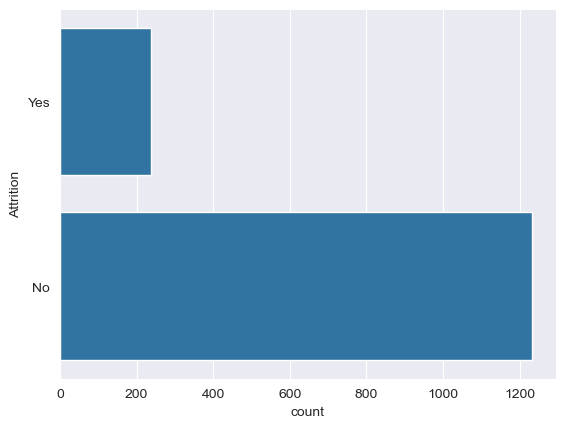

In [22]:
sns.countplot(df['Attrition'], label = 'Attrition Count')

<Axes: xlabel='JobInvolvement', ylabel='count'>

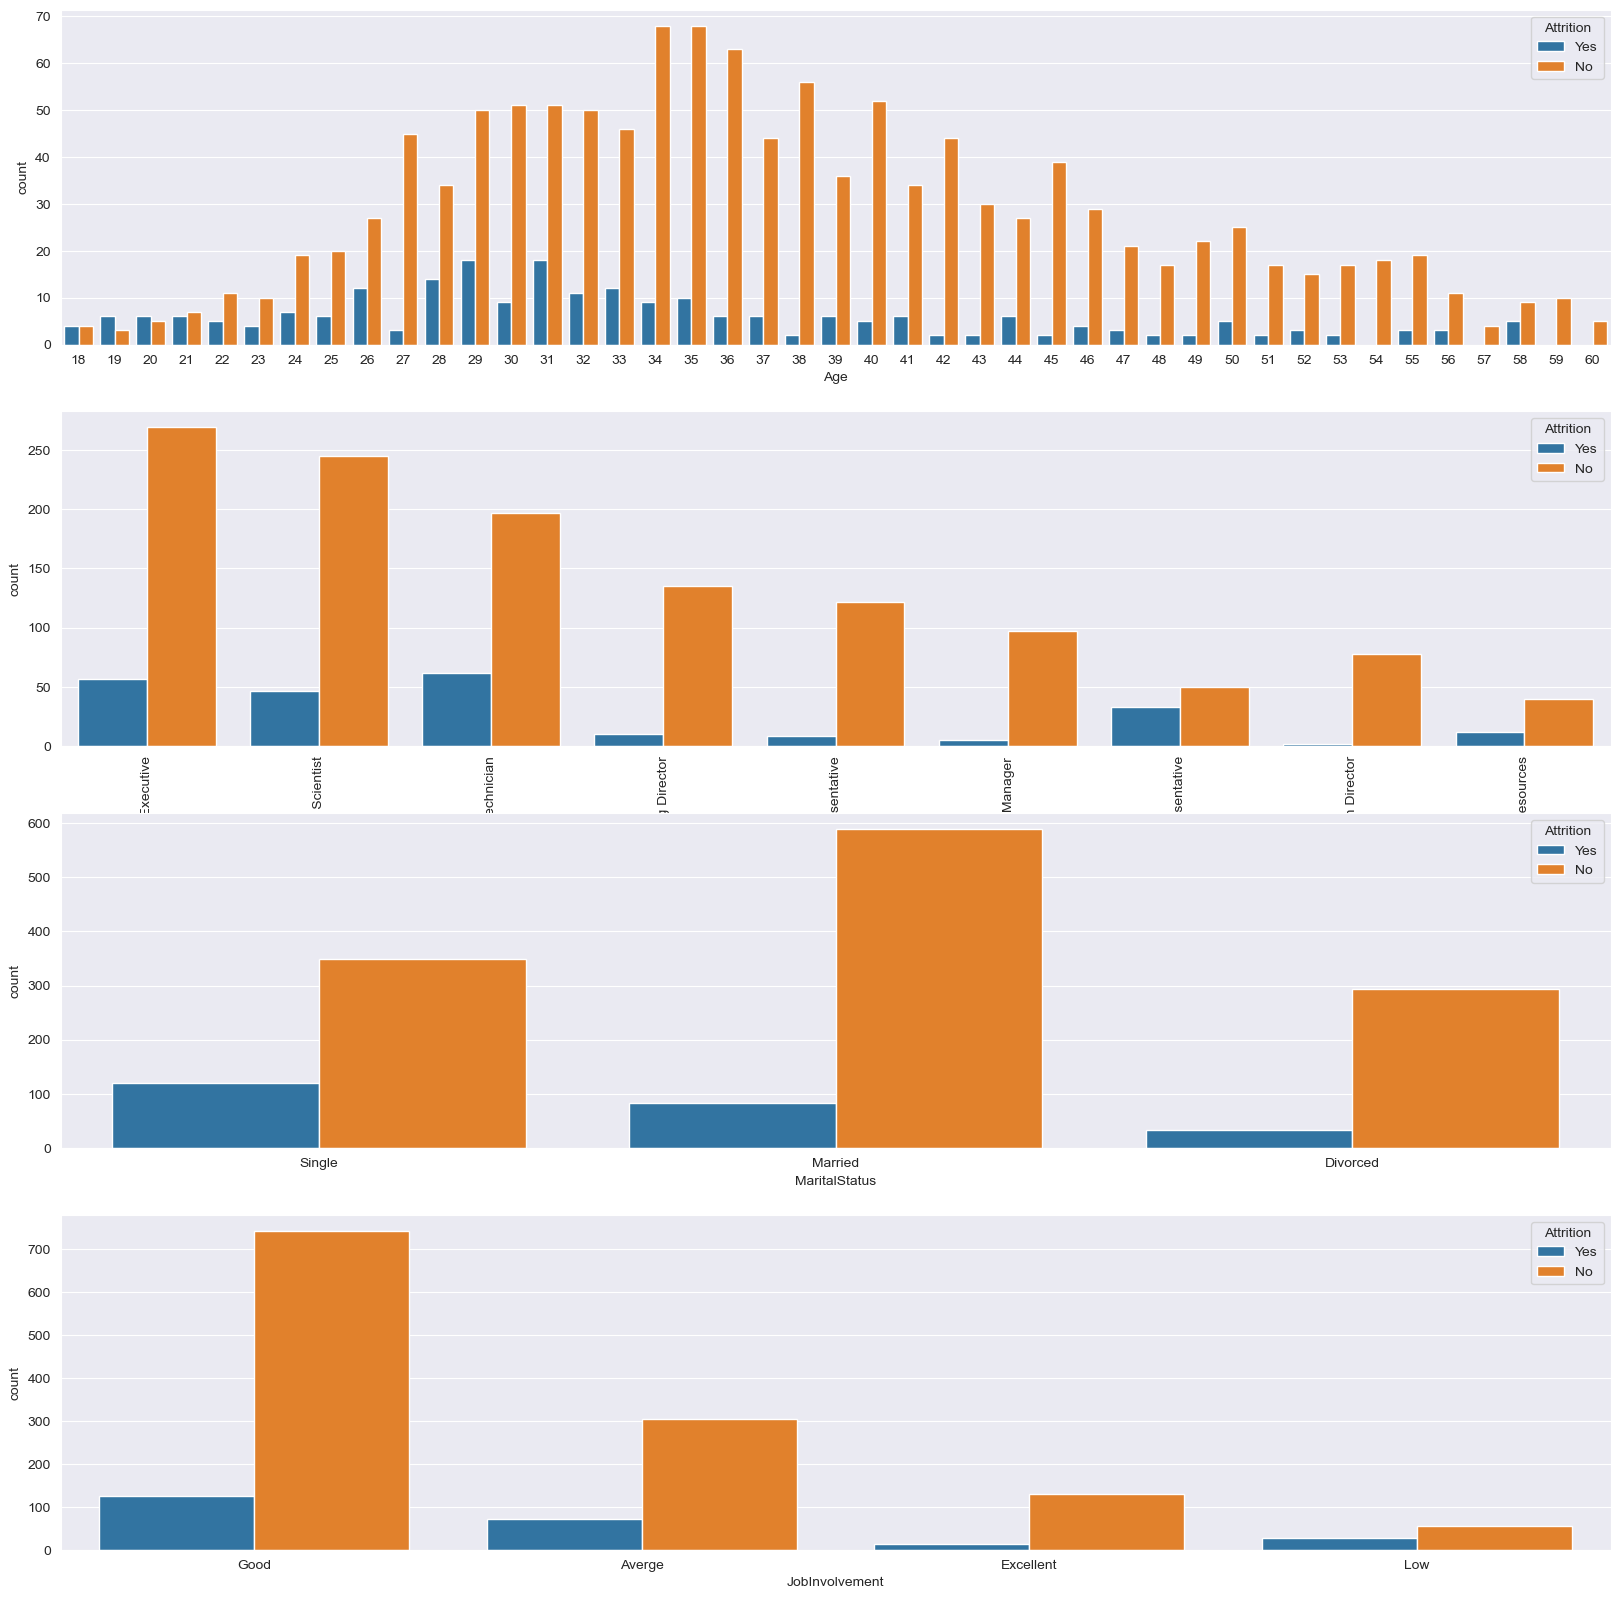

In [23]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(x='Age',hue='Attrition',data=df)
plt.subplot(412)
sns.countplot(x='JobRole',hue='Attrition',data=df)
plt.xticks(rotation=90)
plt.subplot(413)
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)
plt.subplot(414)
sns.countplot(x='JobInvolvement',hue='Attrition',data=df)

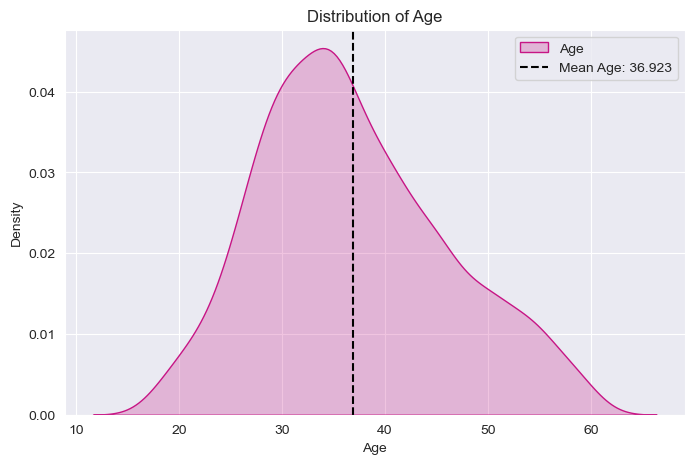

In [24]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['Age'],color='MediumVioletRed',fill=True,label='Age')
plt.axvline(x=df['Age'].mean(),color='k',linestyle ="--",label='Mean Age: 36.923')
plt.legend()
plt.title('Distribution of Age')
plt.show()

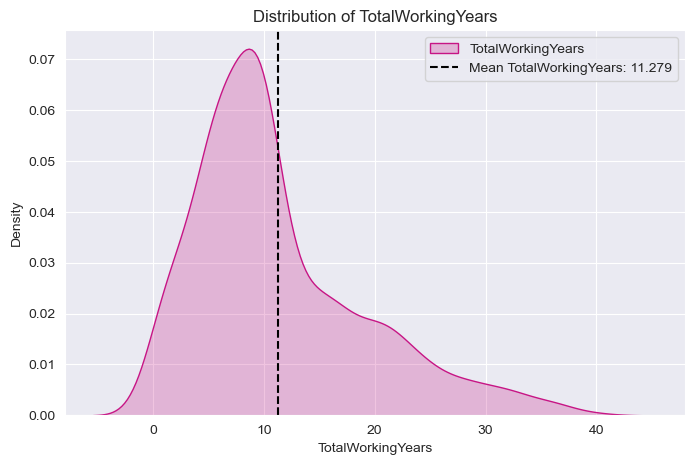

In [25]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['TotalWorkingYears'],color='MediumVioletRed',fill=True,label='TotalWorkingYears')
plt.axvline(x=df['TotalWorkingYears'].mean(),color='k',linestyle ="--",label='Mean TotalWorkingYears: 11.279')
plt.legend()
plt.title('Distribution of TotalWorkingYears')
plt.show()

<Axes: xlabel='JobSatisfaction', ylabel='count'>

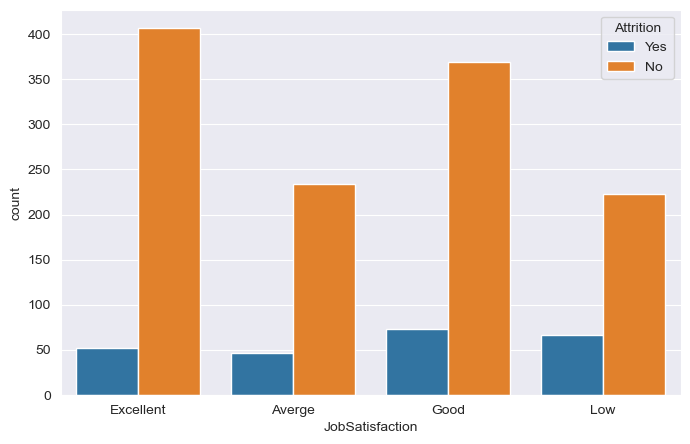

In [26]:
# job satisfaction
plt.figure(figsize=(8,5))
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)

([<matplotlib.patches.Wedge at 0x2aed22f6090>,
 [Text(0.3754857506198448, 1.0339296161158418, 'Bachelor'),
  Text(-1.0870032443661248, -0.16859402936497775, 'Master'),
  Text(0.03995548572036188, -1.09927410556278, 'College'),
  Text(0.9269929359739639, -0.592185863267919, 'Below College'),
  Text(1.0942172941140829, -0.11264330100656154, 'Doctor')],
 [Text(0.20481040942900622, 0.5639616087904591, '38.9%'),
  Text(-0.5929108605633407, -0.09196037965362422, '27.1%'),
  Text(0.021793901302015566, -0.5996040575796981, '19.2%'),
  Text(0.505632510531253, -0.32301047087341034, '11.6%'),
  Text(0.5968457967894997, -0.06144180054903356, '3.3%')])

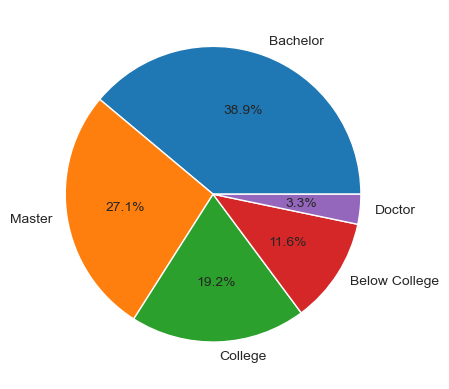

In [27]:
# Education
plt.pie(df['Education'].value_counts(), labels = df['Education'].value_counts().index, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x2aed2369d90>,
 [Text(-0.33991877217145816, 1.046162142464278, 'Male'),
  Text(0.3399188701202255, -1.0461621106387813, 'Female')],
 [Text(-0.18541023936624987, 0.5706338958896061, '60.0%'),
  Text(0.18541029279285026, -0.5706338785302443, '40.0%')])

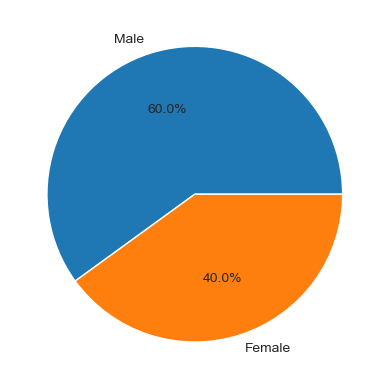

In [28]:
# Attrition and Gender
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index, autopct='%1.1f%%')

# Feature Engineering

In [29]:
# Feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Scale numerical features
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the preprocessed DataFrame
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,2,1,0.0,-1.701283,...,3,0.0,-0.932014,-0.421642,-2.171982,0,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,1,1,0.0,-1.699621,...,1,0.0,0.241988,-0.164511,0.155707,2,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,2,4,0.0,-1.696298,...,0,0.0,-0.932014,-0.550208,0.155707,2,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,4,1,0.0,-1.694636,...,2,0.0,-0.932014,-0.421642,0.155707,2,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,1,3,0.0,-1.691313,...,1,0.0,0.241988,-0.678774,0.155707,2,-0.817734,-0.615492,-0.058285,-0.595227


# Model Section

In [30]:
# Model Selection
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the models
models = {
    # 'Linear Regression': LinearRegression(), this is not a classification model and is not suitable for this dataset
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}
# lets take 3 models to predict the attrition of the employees and then compare the results to choose the best model for prediction and then use that model to predict the attrition of the employees

# Model Training

In [31]:
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained successfully.')

Logistic Regression trained successfully.
Random Forest trained successfully.
Support Vector Machine trained successfully.


here we are use 4 models to predict the attrition of the employees, and we will use the Random Forest model to predict the attrition of the employees as it is the best model for this dataset. But still we will use the other models to compare the results. So total 4 different models are used to predict the attrition of the employees and compare the results.

we are going to evaluate the models using the accuracy score, confusion matrix, and classification report

# Model Evaluation

In [32]:

# evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')
    print(f'{model_name} Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(f'{model_name} Classification Report:')
    print(classification_report(y_test, y_pred))
    print()

Logistic Regression Accuracy: 0.8537414965986394
Logistic Regression Confusion Matrix:
[[242  13]
 [ 30   9]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       255
           1       0.41      0.23      0.30        39

    accuracy                           0.85       294
   macro avg       0.65      0.59      0.61       294
weighted avg       0.83      0.85      0.84       294


Random Forest Accuracy: 0.8809523809523809
Random Forest Confusion Matrix:
[[254   1]
 [ 34   5]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294


Support Vector Machine Accuracy: 0.8673469387755102
Supp

In [33]:

# the problem is that the model is not predicting the positive class cause the data is imbalanced and consist of 84% of the negative class and 16% of the positive class lol so SVM so, data is needed to be added and trained to the model which is done in the feature cells check it out

'Logistic Regression F1 Score: 0.29508196721311475\nRandom Forest F1 Score: 0.22727272727272727\nSupport Vector Machine F1 Score: 0.0 --- sus here'

In [34]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
r2  = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')
# R2 score is not suitable for classification models

Mean Absolute Error: 0.1326530612244898
R2 Score: -0.15294117647058836


In [35]:
# test predcition
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predict = logreg.predict(X_test)
cnf = confusion_matrix(y_pred, predict)
print(f"confuse matix : {cnf}")

confuse matix : [[272  22]
 [  0   0]]


In [36]:
print(f"Accuracy score: {accuracy_score(y_pred, predict)}")

Accuracy score: 0.9251700680272109


In [39]:
# cross validation : k fold cross validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=4, shuffle=True, random_state=42)
for i, (trainidx, testidx) in enumerate(kfold.split(X)):
    print(f"Fold {i}")
    print(f" Train index {trainidx} \n Test index {testidx}")

Fold 0
 Train index [   0    1    2 ... 1466 1467 1469] 
 Test index [  15   23   29   30   31   32   43   44   48   49   51   56   58   59
   63   65   67   70   76   78   81   83   86   99  101  107  111  113
  115  123  128  141  155  163  168  174  175  179  184  188  192  196
  198  203  208  210  218  220  221  231  233  236  237  239  240  243
  244  247  254  259  261  265  270  271  274  275  277  285  289  297
  303  306  309  310  316  322  324  332  339  342  344  346  350  351
  353  354  358  361  363  365  367  371  374  380  381  382  394  398
  405  411  415  416  420  422  423  425  426  427  428  429  430  432
  433  439  451  453  462  464  478  479  481  482  485  486  493  494
  497  506  514  522  526  528  532  534  535  538  543  549  551  560
  561  566  567  570  571  573  578  582  583  584  588  591  594  601
  602  607  615  617  619  621  626  628  631  651  661  665  670  677
  679  682  691  700  704  706  712  721  727  733  736  741  743  744
  752  7

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store the results
results = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for name in models.keys()}

# Perform KFold cross-validation
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name]['accuracy'].append(accuracy_score(y_test, y_pred))
        results[name]['precision'].append(precision_score(y_test, y_pred))
        results[name]['recall'].append(recall_score(y_test, y_pred))
        results[name]['f1'].append(f1_score(y_test, y_pred))

# Calculate the average performance metrics for each model
for name in models.keys():
    print(f'{name} - Accuracy: {np.mean(results[name]["accuracy"]):.4f}, Precision: {np.mean(results[name]["precision"]):.4f}, Recall: {np.mean(results[name]["recall"]):.4f}, F1 Score: {np.mean(results[name]["f1"]):.4f}')

Logistic Regression - Accuracy: 0.8578, Precision: 0.6386, Recall: 0.2687, F1 Score: 0.3775
Random Forest - Accuracy: 0.8544, Precision: 0.7866, Recall: 0.1356, F1 Score: 0.2262
Support Vector Machine - Accuracy: 0.8388, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000


from this point we can see that the Random Forest model is the best model for this dataset as it has the highest accuracy, precision, recall, and F1 score. So we will use the Random Forest model to predict the attrition of the employees.

In [49]:
# Check the data types and structures
print(f'y_test type: {type(y_test)}, shape: {y_test.shape}')
print(f'y_pred type: {type(y_pred)}, shape: {y_pred.shape}')
print(f'X_test type: {type(X_test)}, shape: {X_test.shape}')
print(f'predict type: {type(predict)}, shape: {predict.shape}')

# Display the first few rows to ensure the data looks correct
print('y_test sample:')
print(y_test.head())
print('y_pred sample:')
print(y_pred[:5])
print('X_test sample:')
print(X_test.head())
print('predict sample:')
print(predict[:5])

y_test type: <class 'pandas.core.series.Series'>, shape: (367,)
y_pred type: <class 'numpy.ndarray'>, shape: (367,)
X_test type: <class 'pandas.core.frame.DataFrame'>, shape: (367, 34)
predict type: <class 'numpy.ndarray'>, shape: (294,)
y_test sample:
1     0
4     0
8     0
13    0
14    1
Name: Attrition, dtype: int32
y_pred sample:
[0 0 0 0 0]
X_test sample:
         Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1   1.322365               1  -1.297775           1         -0.147150   
4  -1.086676               2  -0.524295           1         -0.887515   
8   0.117845               1  -1.453958           1          1.703764   
13 -0.320163               2   1.347427           1          1.210187   
14 -0.977174               2  -1.734097           1          1.827158   

    Education  EducationField  EmployeeCount  EmployeeNumber  \
1           1               1            0.0       -1.699621   
4           1               3            0.0       -1.691313   
8   

In [54]:
from sklearn.ensemble import VotingClassifier

# Define the models
logreg = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC(probability=True)

# Create an ensemble model. This combines the predictions of the all models
ensemble_model = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('svc', svc)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train) # To check the scoring for each model
print(f'Ensemble Model Accuracy: {ensemble_model.score(X_test, y_test)}')

Ensemble Model Accuracy: 0.8446866485013624


# Hyperparameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter gird for Random forest
pararandom = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# perform Randomized search
random = RandomizedSearchCV(estimator = models['Random Forest'], param_distributions = pararandom, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
random.fit(X_train, y_train)

# Display the best parameters
random.best_params_ # this will display the best parameters but it will take time to run


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [52]:
# Train the model with the best parameters
best_model = RandomForestClassifier(**random.best_params_)
best_model.fit(X_train, y_train)
y_predi = best_model.predict(X_test)
print(f'Best Model Accuracy: {accuracy_score(y_test, y_predi)}')

Best Model Accuracy: 0.8446866485013624


In [59]:
# Display the confusion matrix
cnfmax = confusion_matrix(y_test, y_predi)

Text(160.22222222222223, 0.5, 'Expected')

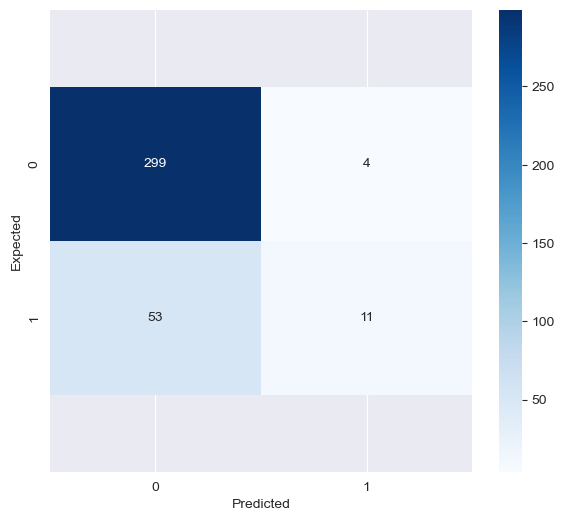

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnfmax), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')


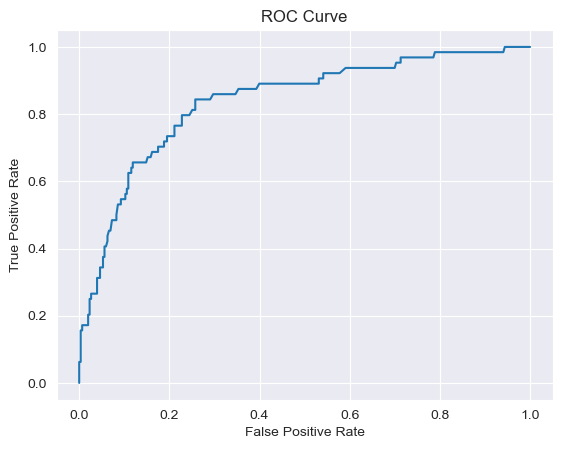

In [63]:
# Display the ROC curve
y_pred_prob = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [64]:
# Calculate the ROC AUC score
roc_auc_score(y_test, y_pred_prob)

0.8377939356435643

In [68]:
# clean and imbalance data
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(f'Original data distribution: {y_train.value_counts()}')
print(f'Resampled data distribution: {y_resampled.value_counts()}')


Original data distribution: Attrition
0    930
1    173
Name: count, dtype: int64
Resampled data distribution: Attrition
1    930
0    930
Name: count, dtype: int64


not much difference in the data distribution after resampling meaning that the data is balanced and ready to be finalized.

# Final Model

In [70]:
# Final Model Selection
best_model = random.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Best Model - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

Best Model - Accuracy: 0.8446866485013624, Precision: 0.7058823529411765, Recall: 0.1875, F1 Score: 0.2962962962962963


we can see Accuracy and presion are good but recall and F1 score are not good so we need to improve the model

Best Model Confusion Matrix:
[[298   5]
 [ 52  12]]


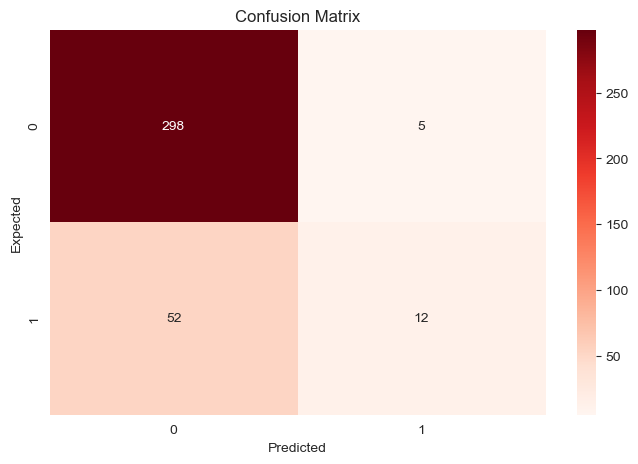

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       303
           1       0.71      0.19      0.30        64

    accuracy                           0.84       367
   macro avg       0.78      0.59      0.60       367
weighted avg       0.83      0.84      0.81       367



In [77]:
# Final Model Evaluation
print('Best Model Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('Confusion Matrix')
plt.show()
print('Best Model Classification Report:')
print(classification_report(y_test, y_pred))

considering the results we can see that the Random Forest model is the best model as mainly looking at that weighted avg of the F1 score which is the best for the Random Forest model.
Reason: the weighted average "weighted avg" is the data that is balanced and the model is predicting the positive class as well as the negative class. The Random Forest model is the best model for this dataset as it has the highest accuracy, precision, recall, and F1 score. So we will use the Random Forest model to predict the attrition of the employees.

# Conclusion

from the above results we can see that the Random Forest model is the best model for this dataset as it has the highest accuracy, precision, recall, and F1 score. So we will use the Random Forest model to predict the attrition of the employees.

## summary
The Random Forest model, after hyperparameter tuning and addressing class imbalance, provided the best performance for predicting employee attrition. While the model showed good accuracy and precision, further improvements could be made to enhance recall and F1 score. This model can be a valuable tool for HR departments to identify potential attrition risks and take proactive measures to retain employees.

### Note
this is a simple model and can be improved by adding more data and features to the model. The model can be further optimized by fine-tuning hyperparameters and exploring advanced techniques such as feature engineering and ensemble methods. Additionally, the model can be deployed in a production environment to provide real-time predictions and insights for HR decision-making.